In [1]:
import networkx as nx
import numpy as np
import torch
import argparse
import sys 
import pickle
import matplotlib.pyplot as plt

In [2]:
def make_graphs(n_nodes=None, p_conn=None, verbose=True, save=None, seed=None):
    """
    creates len(n_nodes)*len(p_conn) many graphs and saves them as pickle file
    of specified file name save
    """
    list_graphs = []
    list_adjacency_matrices = []
    if verbose:
        print("n_nodes\t p_connectivity\t edge_matrix shape/% of n_nodes with edges\n")
    if not n_nodes:
        n_nodes = [250,350,450,550]
    if not p_conn:
        p_conn = [0.05, 0.01, 0.005, 0.001, 0.0005]#probability of a node being chosen for an edge
    if not isinstance(seed,int):
        seed = 1
    for n in n_nodes:#nr. nodes
        for j in p_conn:#connectivity
            G = nx.gnp_random_graph(n, j, seed=int(seed), directed=False)
            edge_matrix = np.asarray((G.edges())).T
            A = nx.to_numpy_array(G)
            list_adjacency_matrices.append(A)
            if verbose:
                print(f"{n}\t {j}\t\t {edge_matrix.shape}\t{edge_matrix.shape[1]/n:.2f}%")
            list_graphs.append(G)
        if verbose:
            print("\n")
    if save:
        import pickle
        with open(f"{save}_nx_graphs.pkl", "wb") as fp:
            pickle.dump(list_graphs, fp)
        with open(f"{save}_npy_adj_matrices.npy", "wb") as fp:
            np.save(fp,np.asarray(list_adjacency_matrices, dtype=object))
            
    return list_graphs, list_adjacency_matrices

In [3]:
#Create graphs/adjacency matrix
graphs, adj_matrix = make_graphs()

n_nodes	 p_connectivity	 edge_matrix shape/% of n_nodes with edges

250	 0.05		 (2, 1608)	6.43%
250	 0.01		 (2, 348)	1.39%
250	 0.005		 (2, 195)	0.78%
250	 0.001		 (2, 39)	0.16%
250	 0.0005		 (2, 15)	0.06%


350	 0.05		 (2, 3097)	8.85%
350	 0.01		 (2, 655)	1.87%
350	 0.005		 (2, 362)	1.03%
350	 0.001		 (2, 80)	0.23%
350	 0.0005		 (2, 37)	0.11%


450	 0.05		 (2, 4989)	11.09%
450	 0.01		 (2, 1026)	2.28%
450	 0.005		 (2, 541)	1.20%
450	 0.001		 (2, 111)	0.25%
450	 0.0005		 (2, 53)	0.12%


550	 0.05		 (2, 7480)	13.60%
550	 0.01		 (2, 1515)	2.75%
550	 0.005		 (2, 788)	1.43%
550	 0.001		 (2, 163)	0.30%
550	 0.0005		 (2, 74)	0.13%




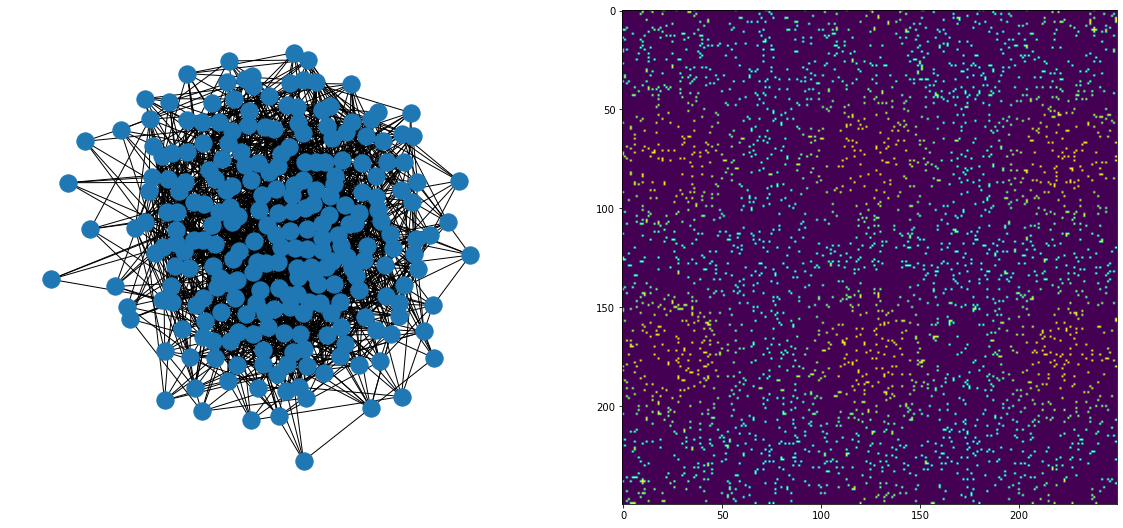

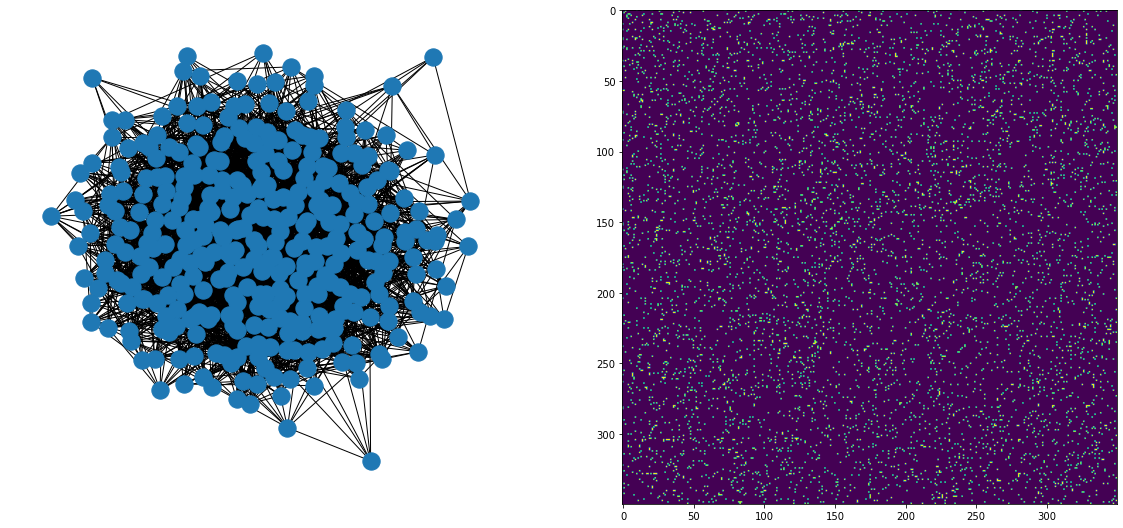

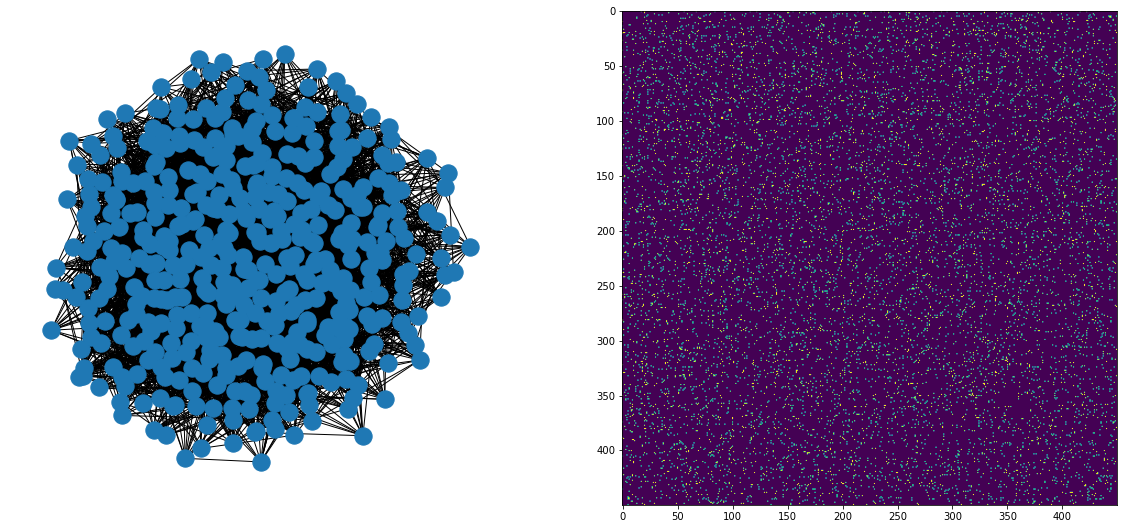

In [4]:
#plot graphs and show adjacency matrix
plt.figure(figsize=(20,20))

plt.subplot(221)
nx.draw(graphs[0])
plt.subplot(222)
plt.imshow(adj_matrix[0])

plt.figure(figsize=(20,20))

plt.subplot(221)
nx.draw(graphs[5])
plt.subplot(222)
plt.imshow(adj_matrix[5])


plt.figure(figsize=(20,20))
plt.subplot(221)
nx.draw(graphs[10])
plt.subplot(222)
plt.imshow(adj_matrix[10])



In [7]:
#Step 4 solve wave equation on graph (Finite Difference)


#Define Initial Condition
Nx = len(pathlth)
u_1 = np.zeros(Nx)
u_1[0] = 1
print("signal",u_1)


#Define numerical paramaters
Nt = 30
dx = 1
dt = 0.5
c = 0.5
C = (c*(dt/dx))**2
#store solution in matrix
u_solthree = []

#Get field value for first time step
u = np.zeros(Nx)
for i in range(1,Nx-1): #Only go through interior points of mesh
    
    a = posmat[i,0]#Forwards node
    b = posmat[i,1]#backwards node
    
    #update value based on neighboring nodes
    u[i] = u_1[i] - (0.5*C*(u_1[a] - 2*u_1[i] + u_1[b]))

#Dirichlet Boundary Conditions
u[0] = 0
u[-1] = 0

#Store first time step
u_solthree.append(u)

#Define two-previous time steps
u_2 = u_1
u_1 = u 
    
#Go through the rest of the time step
for j in range(1,Nt):
    
    for i in range(1,Nx-1):

        a = posmat[i,0]#Forwards node
        b = posmat[i,1]#backwards node

        u[i] = -u_2[i] + 2*u_1[i] + (C*(u_1[a]-2*u_1[i] + u_1[b]))

    #Dirichlet Boundary Conditions
    u[0] = 0
    u[-1] = 0
    
    #Store solution
    u_solthree.append(u)

    #Re-define two-previous time steps
    u_2 = u_1
    u_1 = u 


u_solthree = np.array(u_solthree)



signal [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
#Step 2: Define 2-NN on graphs

#Get dictionary of shortest path lengths from each source to target node
pathlth = dict(nx.all_pairs_shortest_path_length(Gthree))


#for each source node, get two closest target nodes: Create n x 3 array (NOTE: dictionary is already sorted in ascending order)
clneighb = []
clneighbdist = []
for j in range(len(pathlth)):#For each source node
    
    snode = []
    snodepath = []
    for i in pathlth[j]:#Go through all target nodes
        snode.append(i)#append keys (target nodes) 
        snodepath.append(pathlth[j][i])#appned values (distances)
    clneighb.append(snode[1:3]) #Get two closest target nodes for each sorce node
    clneighbdist.append(snodepath[1:3]) #Get distances of two closest target nodes
    
clneighb = np.array(clneighb)
clneighbdist = np.array(clneighbdist)
posmat = np.concatenate((np.arange(len(snode)).reshape(len(snode),1),clneighb),axis=1)#position matrix
distmat = np.concatenate((np.arange(len(snode)).reshape(len(snode),1),clneighbdist),axis=1)#position matrix

print("postion matrix:",posmat)
print("distance matrix:",distmat)



postion matrix: [[0 1 5]
 [1 0 2]
 [2 1 3]
 [3 2 4]
 [4 3 5]
 [5 0 4]
 [6 5 7]
 [7 8 6]
 [8 9 7]
 [9 8 0]]
distance matrix: [[0 1 1]
 [1 1 1]
 [2 1 1]
 [3 1 1]
 [4 1 1]
 [5 1 1]
 [6 1 1]
 [7 1 1]
 [8 1 1]
 [9 1 1]]


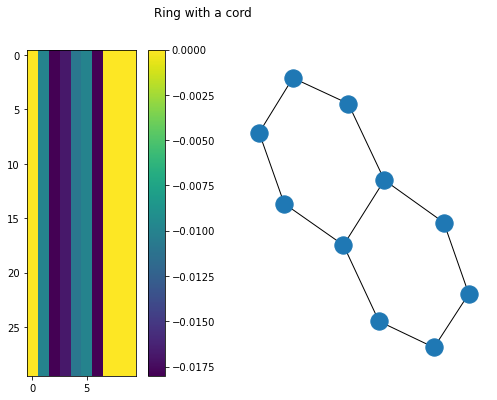

In [8]:

#plt.figure(figsize = (10,6))
#plt.suptitle("Ring")
#plt.subplot(1,2,1)
#plt.imshow(u_soltwo)
#plt.colorbar()
#plt.subplot(1,2,2)
#nx.draw(Gtwo)

plt.figure(figsize = (10,6))
plt.suptitle("Ring with a cord")
plt.subplot(1,2,1)
plt.imshow(u_solthree)
plt.colorbar()
plt.subplot(1,2,2)
nx.draw(Gthree)


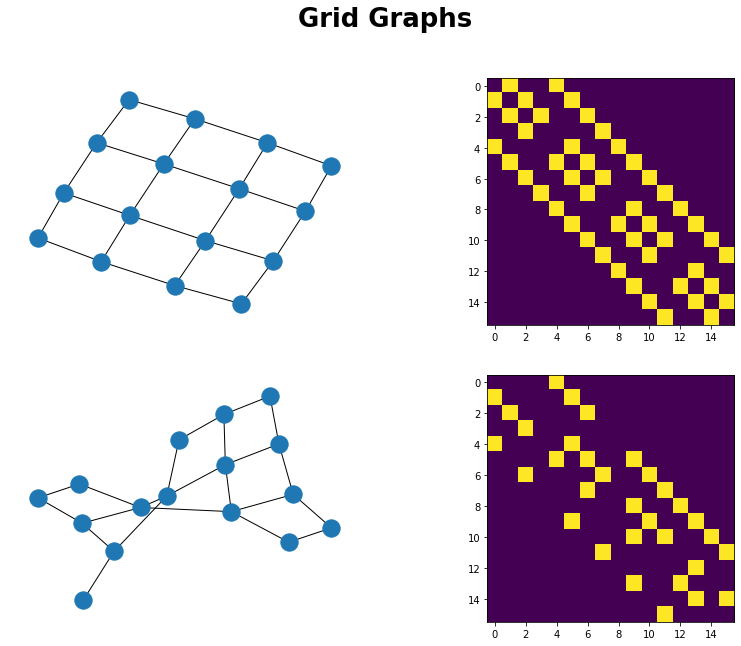

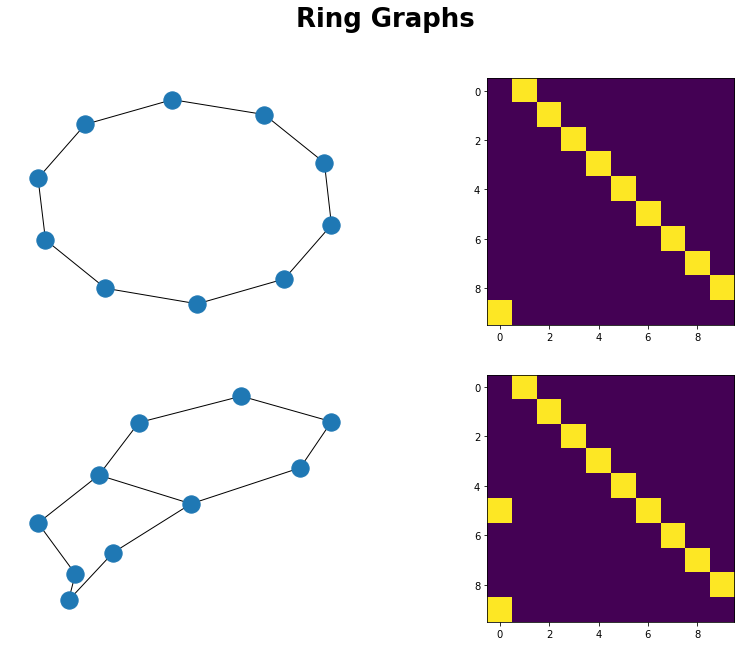

In [61]:
#Step 1: Define graphs

#Create grid graph
Gone = nx.grid_2d_graph(4,4)
Aone = nx.to_numpy_array(Gone)


#Go through each row in adjacency matrix and remove one connection randomly (don't want a singular matrix)
Atwo = nx.to_numpy_array(nx.grid_2d_graph(4,4))
for i in range(Atwo.shape[0]):
    connecind = np.argwhere(Atwo[i,:] == 1).squeeze()
    rmind = np.random.choice(connecind,size=1)
    Atwo[i,rmind] = 0
Gtwo = nx.from_numpy_matrix(Atwo)




#Create rings
n = 10
Athree = np.zeros((n,n))
for i in range(n):
    if i == n-1:
        Athree[i,0] = 1
        break
    Athree[i,i+1] = 1

Gthree = nx.from_numpy_matrix(Athree)
#Create ring with cord


n = 10
Afour = np.zeros((n,n))
for i in range(n):
    if i == n-1:
        Afour[i,0] = 1
        break
    Afour[i,i+1] = 1

Afour[5,0] = 1
Gfour = nx.from_numpy_matrix(Afour)


plt.figure(figsize = (14,10))
plt.suptitle("Grid Graphs",fontweight='bold',fontsize=26)
plt.subplot(221)
nx.draw(Gone)
plt.subplot(222)
plt.imshow(Aone)
plt.subplot(223)
nx.draw(Gtwo)
plt.subplot(224)
plt.imshow(Atwo)
plt.savefig('Grid_graphs.png')


plt.figure(figsize = (14,10))
plt.suptitle("Ring Graphs",fontweight='bold',fontsize=26)
plt.subplot(221)
nx.draw(Gthree)
plt.subplot(222)
plt.imshow(Athree)
plt.subplot(223)
nx.draw(Gfour)
plt.subplot(224)
plt.imshow(Afour)
plt.savefig('Ring_graphs.png')




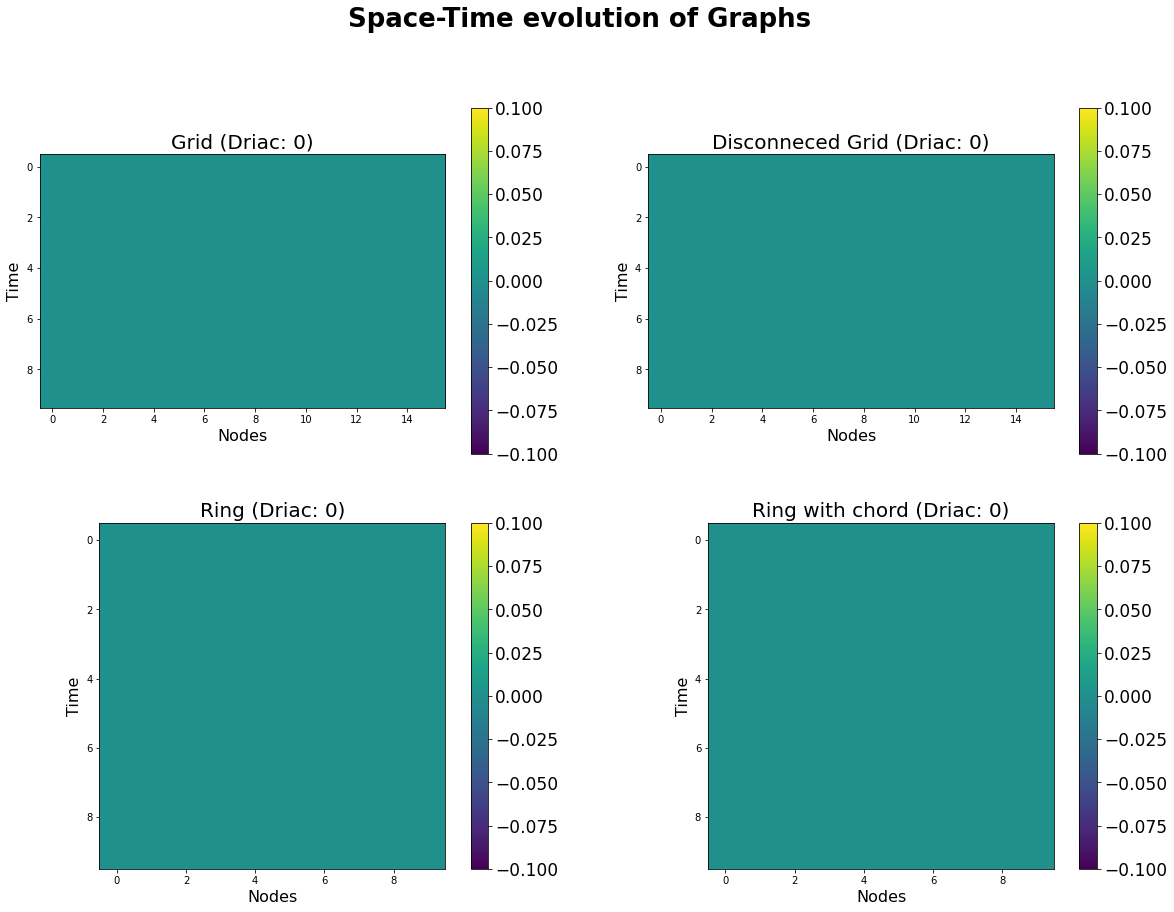

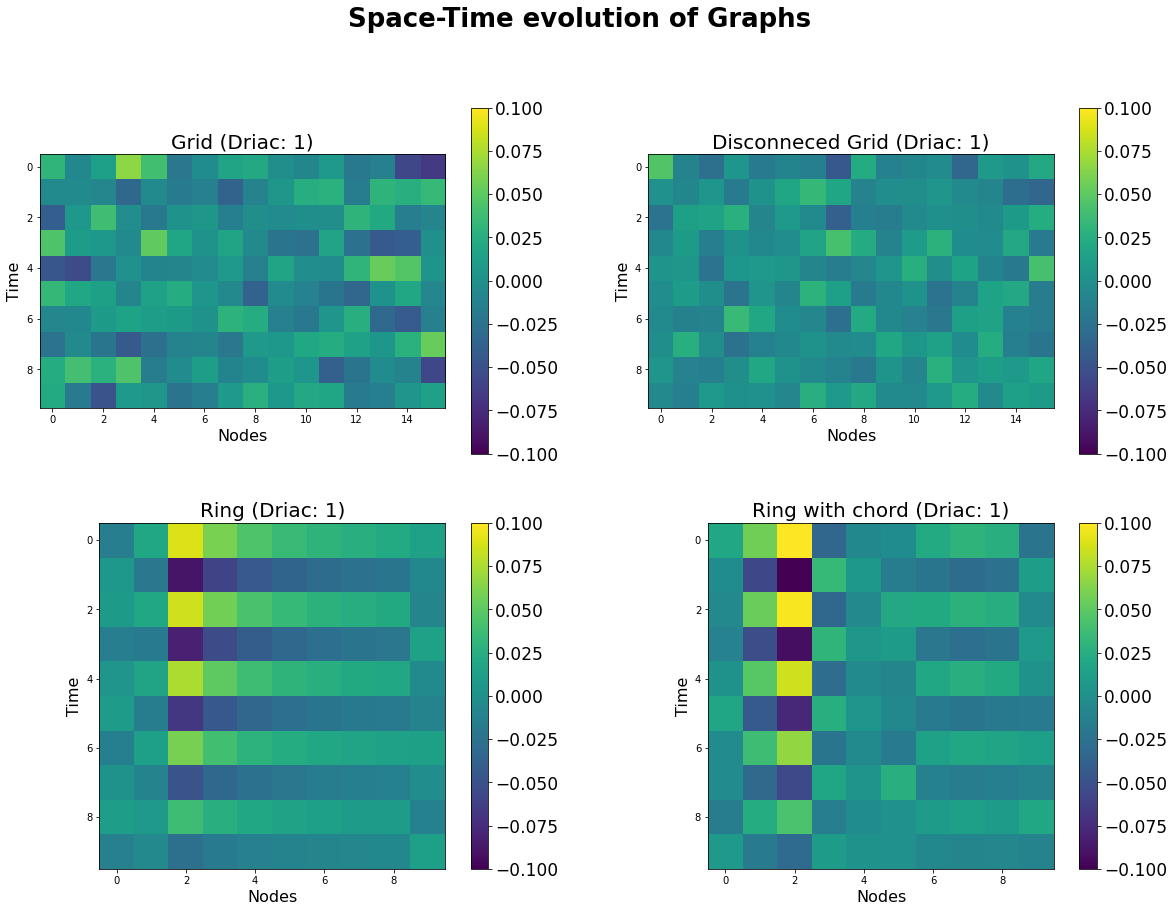

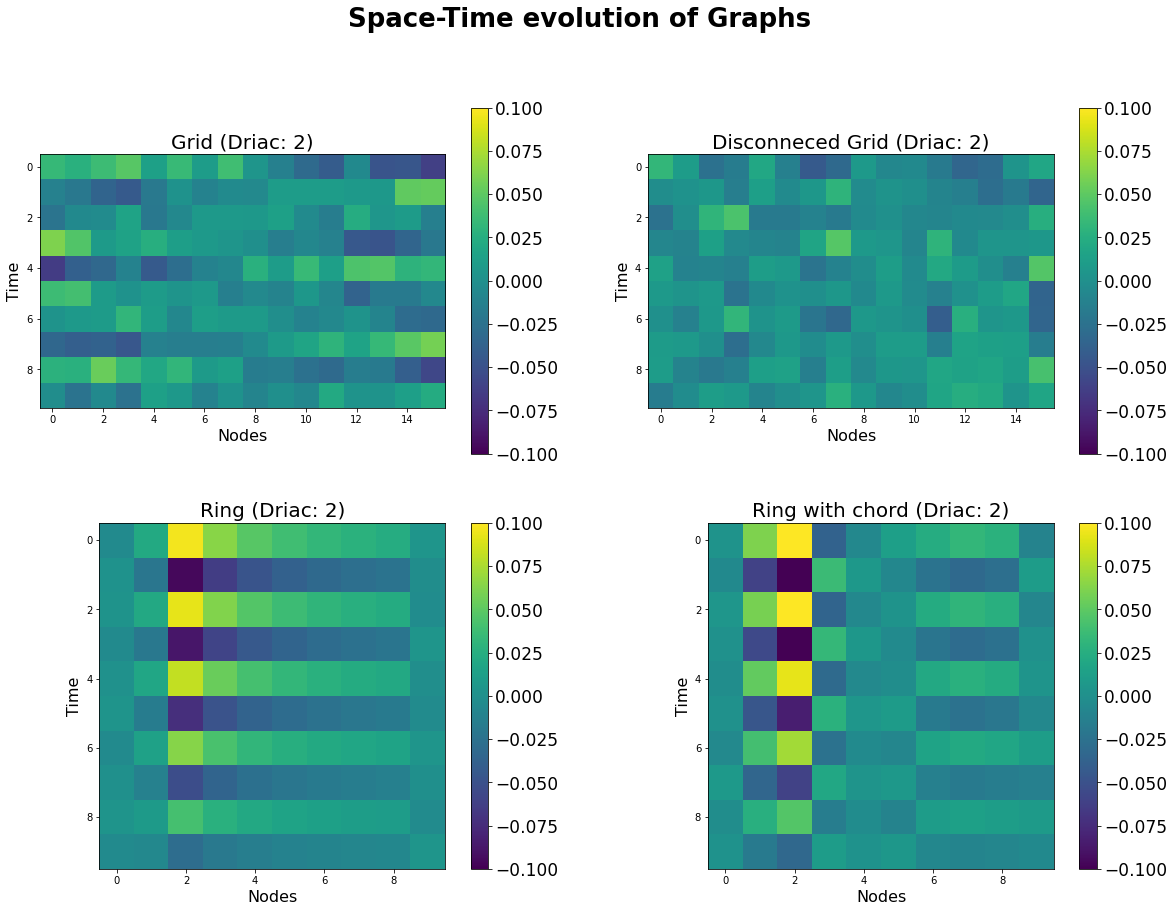

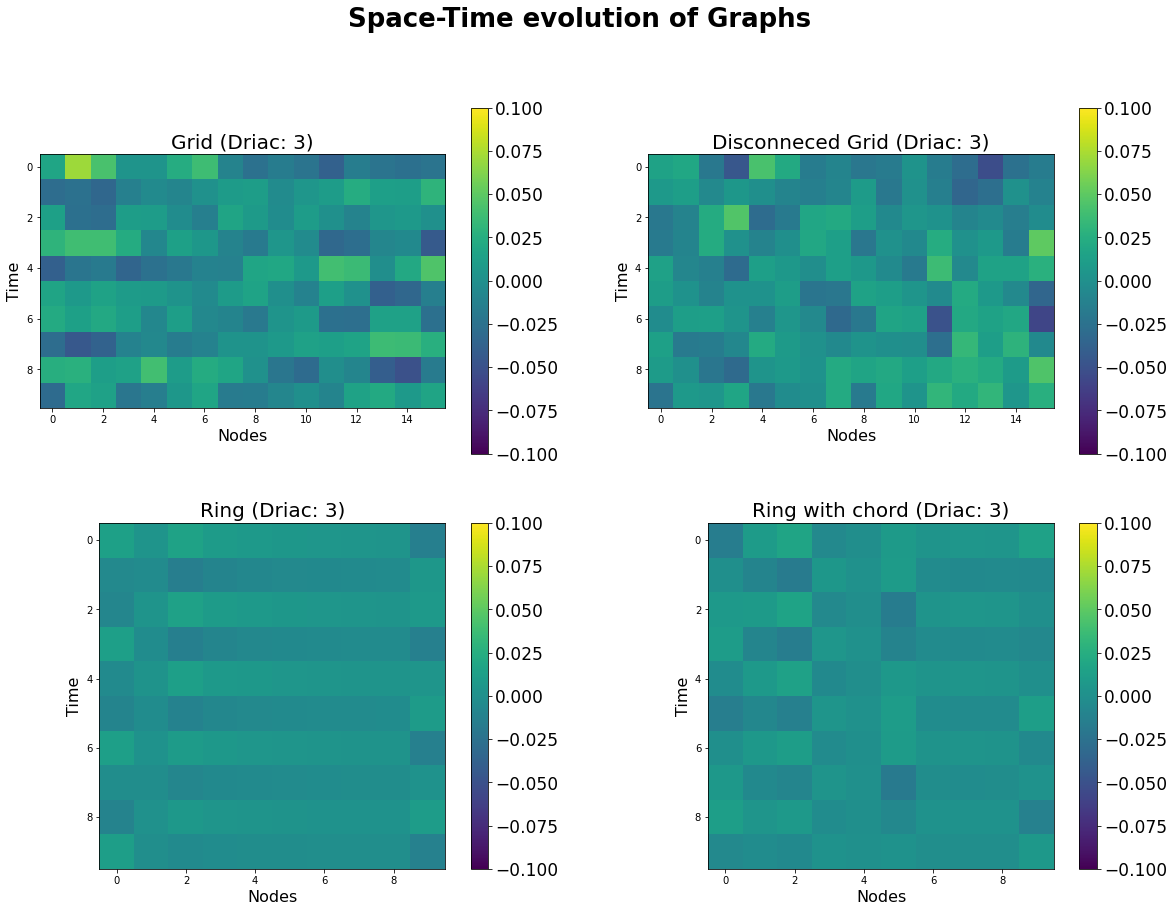

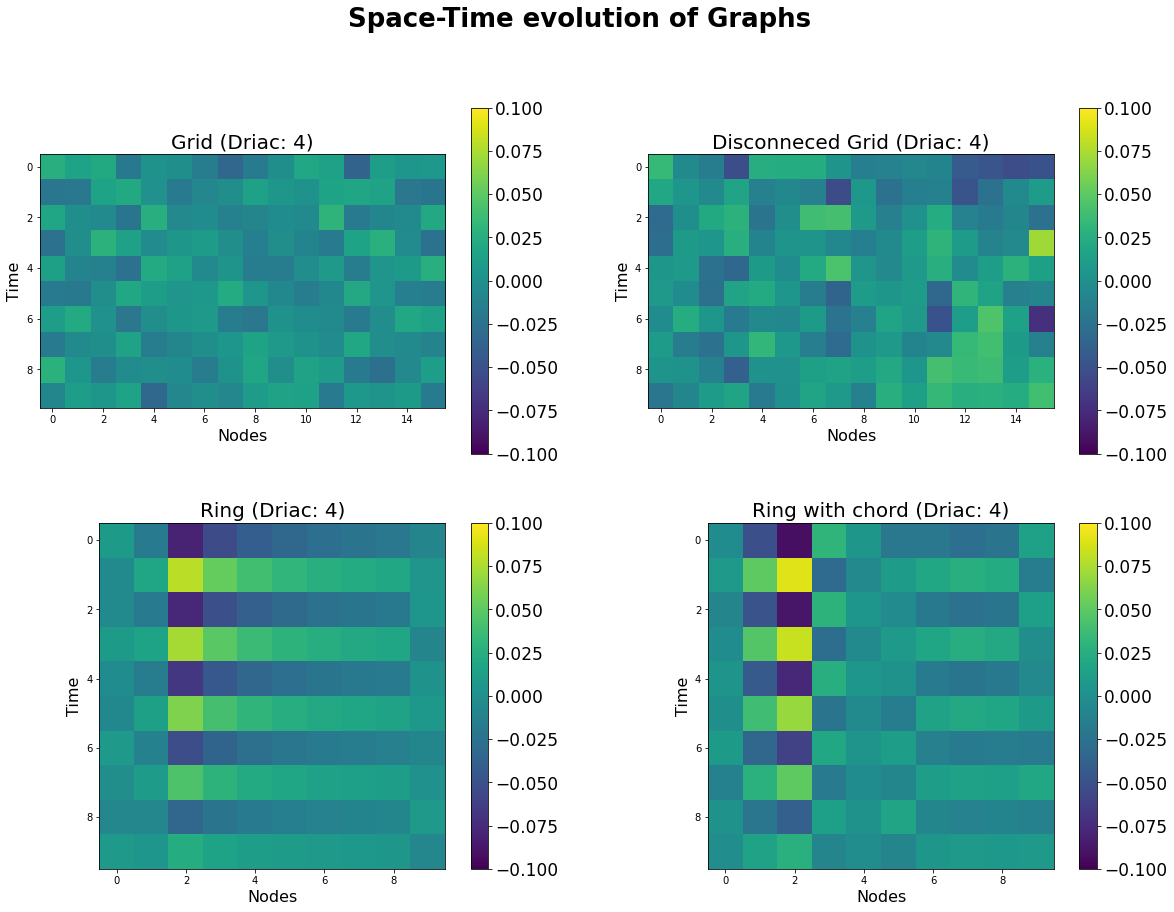

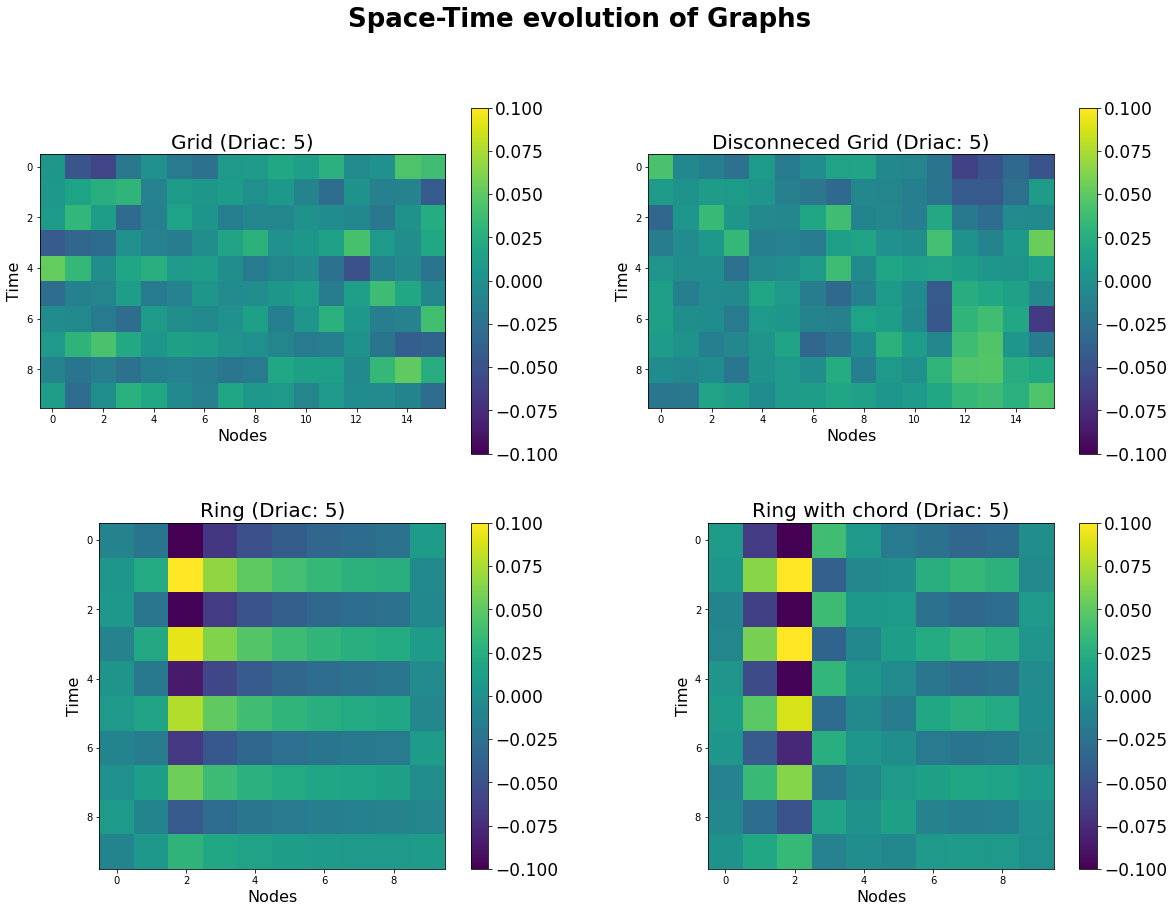

In [65]:
#Analytical solution (Looking at eigenvectors of graph Laplacian)

#Compute Degree Matrix
Done = np.diag(np.sum(Aone,axis=1))
Dtwo = np.diag(np.sum(Atwo,axis=1))
Dthree = np.diag(np.sum(Athree,axis=1))
Dfour = np.diag(np.sum(Afour,axis=1))


#Compute Laplacian Matrix
Lone = Done - Aone
Ltwo = Dtwo - Atwo
Lthree = Dthree - Athree
Lfour = Dfour - Afour

#Compute Inverse
Doneinv = np.linalg.inv(Done)
Dtwoinv = np.linalg.inv(Dtwo)
Dthreeinv = np.linalg.inv(Dthree)
Dfourinv = np.linalg.inv(Dfour)

#Compute eigenmodes of wave equation

opone = Doneinv @ Lone
eivalone, eivecone = np.linalg.eigh(Lone)
eivalone[0] = 0 #Sometimes I get an errant negative eigenvalue for first eigenvalue so I set equal to 0

optwo = Dtwoinv @ Ltwo
eivaltwo, eivectwo = np.linalg.eigh(Ltwo)
eivaltwo[0] = 0

opthree = Dthreeinv @ Lthree
eivalthree, eivecthree = np.linalg.eigh(Lthree)
eivalthree[0] = 0

opfour = Dfourinv @ Lfour
eivalfour, eivecfour = np.linalg.eigh(Lfour)
eivalfour[0] = 0



#Compute solution to wave equation [Dirichlet boundary conditions - 0 on boundary][Dirac initial condition] 

def computewave(spatsol,eivals,c,t,initcond):

    modes = np.arange(spatsol.shape[0]) #Defining shape of eigenmodes
    allmodes = np.zeros((t.shape[0],spatsol.shape[0],spatsol.shape[0])) #Defining matrix of eigenmodes
    for n in modes: #compute time evolution of soulution for each mode

        #Compute coefficient
        coeff = np.zeros(spatsol.shape[0])
        for i in range(spatsol.shape[0]):
            coeff[i] = np.sin(np.sqrt(eivals[n])*i) * initcond[i]
        timecoeff = np.sum(coeff)

        #Store all eigenmodes
        solmode = np.zeros((t.shape[0],spatsol.shape[0]))
        for i in range(len(t)):
            const = (2/((n+1)*np.pi*c))
            solmode[i,:] = const * timecoeff * np.cos(np.sqrt(eivals[n])*c*t[i]) * spatsol[:,n]
        allmodes[:,:,n] = solmode
        finalsol = np.sum(allmodes,axis=2) #summing over all modes
    
    return finalsol, allmodes

""""

#Define simulation parameters
init = np.zeros(10) #Initial Condition
wavel = 3 #wave velocity
time = np.arange(10) #set time

meansol = np.zeros(init.shape[0])
cheigen = np.zeros((t.shape[0],init.shape[0]))
for i in range(init.shape[0]):
    init[i] = 100
    sol, solm = computewave(eivectwo,eivaltwo,wavel,time,init)
    soltwo, solmtwo = computewave(eivecthree,eivalthree,wavel,time,init)
    meansol[i] = np.abs(np.mean(sol) - np.mean(soltwo))
    
    #Check all eigenmodes for each intial condition setting
    for j in range(init.shape[0]):
        cheigen[i,j] = np.sum(np.abs(solm[:,:,j] - solmtwo[:,:,j]))


plt.title("Eigenmodes with most difference")
plt.imshow(cheigen)
plt.ylabel("Time")
plt.xlabel("Nodes")
plt.colorbar()

"""

#Define simulation parameters

wavel = 3 #wave velocity
time = np.arange(10) #set time

for i in range(i): #Iterating different initial conditions
    
    # Grids
    init = np.zeros(eivecone.shape[0]) #Initial Condition
    init[i] = 1
    solone, solmone = computewave(eivecone,eivalone,wavel,time,init)
    soltwo, solmtwo = computewave(eivectwo,eivaltwo,wavel,time,init)
    
    # Rings
    init = np.zeros(eivecthree.shape[0]) #Initial Condition
    init[i] = 1
    solthree, solmthree = computewave(eivecthree,eivalthree,wavel,time,init)  
    solfour, solmfour = computewave(eivecfour,eivalfour,wavel,time,init)

    plt.figure(figsize=(20,14))
    plt.suptitle("Space-Time evolution of Graphs",fontsize=26,fontweight='bold')
    plt.subplot(2,2,1)
    plt.title("Grid (Driac: " + str(i)+")",fontsize=20)
    if i == 0:
        minone = np.min(solone)
        maxone = np.max(solone)
    plt.imshow(solone,vmin=minone,vmax=maxone)
    plt.ylabel("Time",fontsize=16)
    plt.xlabel("Nodes",fontsize=16)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=17)

    plt.subplot(2,2,2)
    plt.title("Disconneced Grid (Driac: " + str(i)+")",fontsize=20)
    if i == 0:
        mintwo = np.min(soltwo)
        maxtwo = np.max(soltwo)
    plt.imshow(soltwo,vmin=mintwo,vmax=maxtwo)
    plt.ylabel("Time",fontsize=16)
    plt.xlabel("Nodes",fontsize=16)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=17)

    plt.subplot(2,2,3)
    plt.title("Ring (Driac: " + str(i)+")",fontsize=20)
    if i == 0:
        minthree = np.min(solthree)
        maxthree = np.max(solthree)
    plt.imshow(solthree,vmin = minthree,vmax=maxthree)
    plt.ylabel("Time",fontsize=16)
    plt.xlabel("Nodes",fontsize=16)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=17)

    plt.subplot(2,2,4)
    plt.title("Ring with chord (Driac: " + str(i)+")",fontsize=20)
    if i == 0:
        minfour = np.min(solfour)
        maxfour = np.max(solfour)
    plt.imshow(solfour,vmin=minfour,vmax=maxfour)
    plt.ylabel("Time",fontsize=16)
    plt.xlabel("Nodes",fontsize=16)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=17)
    plt.savefig("Dirac" + str(i) + ".png")

    
    
    
    




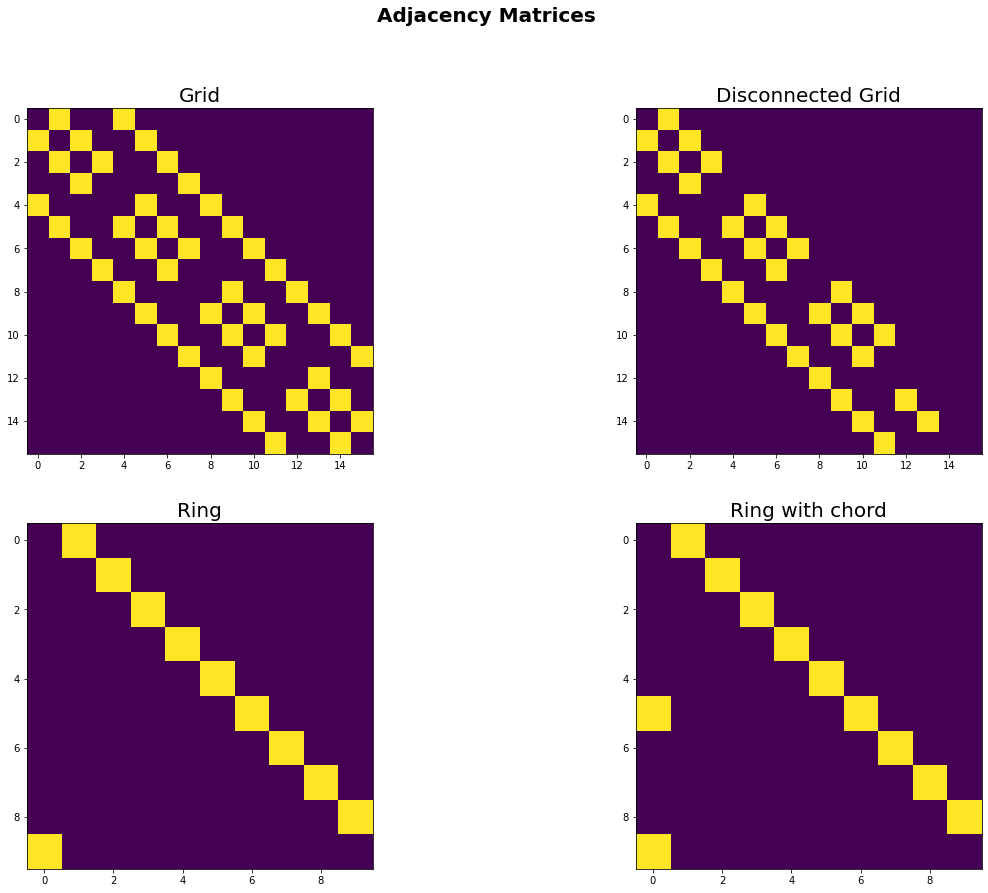

In [40]:
plt.figure(figsize=(20,14))
plt.suptitle("Adjacency Matrices",fontsize=20,fontweight='bold')

plt.subplot(2,2,1)
plt.title("Grid",fontsize=20)
plt.imshow(Aone)

plt.subplot(2,2,2)
plt.title("Disconnected Grid",fontsize=20)
plt.imshow(Atwo)

plt.subplot(2,2,3)
plt.title("Ring",fontsize=20)
plt.imshow(Athree)
plt.savefig("Graphs")

plt.subplot(2,2,4)
plt.title("Ring with chord",fontsize=20)
plt.imshow(Afour)

plt.savefig("Graphs.png")